In [1]:
# In this notebook we implement a simple open cv blob detector
import cv2 as cv
import numpy as np

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from itertools import chain

cv.__version__
%load_ext autoreload
%autoreload 2

# Getting sample data

In [8]:
# Setting up capture
path = '/Users/gert-janboth/Documents/flyTracker/data/movies/short_test.mp4'
cap = cv.VideoCapture(path)

In [3]:
# some properties of video
length = cap.get(cv.CAP_PROP_FRAME_COUNT) # works only on mp4's
width  = cap.get(cv.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)
fps    = cap.get(cv.CAP_PROP_FPS)

print(length, fps, width, height)

120.0 25.0 1280.0 1080.0


In [4]:
# Getting all frames into a numpy array for easy working
movie = []
for _ in np.arange(length):
    #frame_grayscale = cv.cvtColor(cap.read()[1], cv.COLOR_BGR2GRAY)
    movie.append(cap.read()[1])
movie = np.array(movie)    

In [6]:
movie.shape

(120, 1080, 1280, 3)

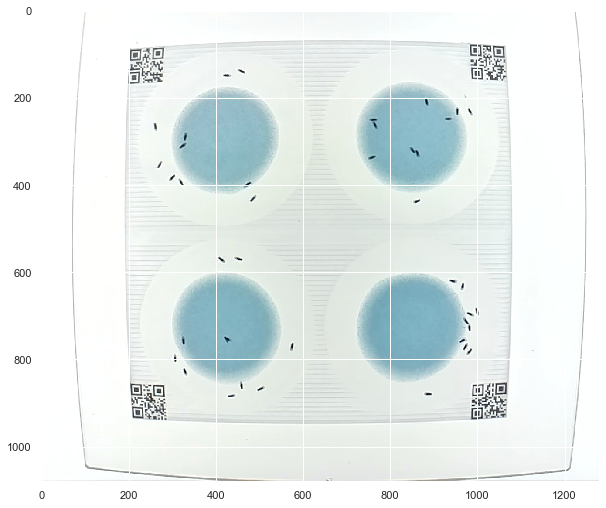

In [5]:
plt.figure(figsize=(10, 10))
frame = 47
plt.imshow(movie[frame])

# Preprocessing

In [6]:
from flytracker.preprocessing import OriginalPreprocessing

In [7]:
movie.shape[:3]

(120, 1080, 1280)

In [8]:
processed_movie = []
for idx in np.arange(movie.shape[0]):
    processed_frame = OriginalPreprocessing()(movie[idx])
    processed_movie.append(processed_frame)
processed_movie = np.array(processed_movie)

In [9]:
processed_movie.shape

(120, 1080, 1280)

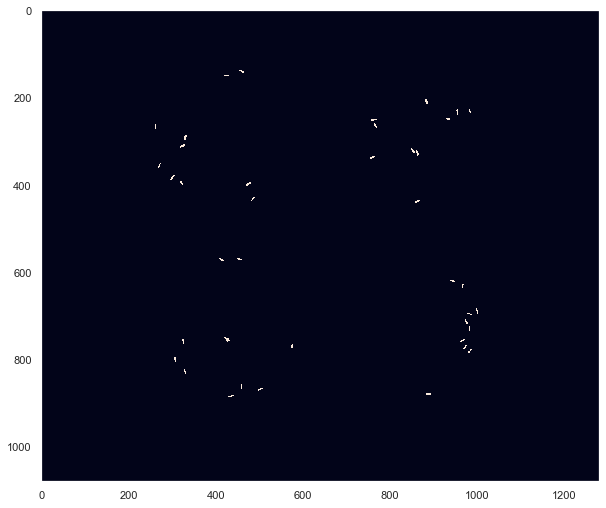

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(processed_movie[47])
plt.grid(False)

# CC

In [11]:
thresh = processed_movie[99, :, :]

In [12]:
%%time
# You need to choose 4 or 8 for connectivity type
connectivity = 8
# Perform the operation
output = cv.connectedComponentsWithStats(thresh, connectivity, cv.CV_32S)
# Get the results
# The first cell is the number of labels
num_labels = output[0]

CPU times: user 12.4 ms, sys: 9.8 ms, total: 22.1 ms
Wall time: 8.33 ms


In [13]:
num_labels

40

In [16]:
output[3]

array([[639.4884524 , 539.53039053],
       [424.80645161, 149.74193548],
       [471.17948718, 164.84615385],
       [882.96078431, 208.37254902],
       [270.86111111, 226.36111111],
       [966.63333333, 221.13333333],
       [954.075     , 234.35      ],
       [822.12371134, 250.39175258],
       [908.44736842, 268.78947368],
       [327.05454545, 306.65454545],
       [319.76470588, 332.76470588],
       [888.46153846, 336.36538462],
       [760.27586207, 337.34482759],
       [865.82692308, 338.88461538],
       [277.        , 366.19444444],
       [292.29268293, 378.70731707],
       [919.70454545, 386.02272727],
       [474.05454545, 398.70909091],
       [338.27272727, 399.22727273],
       [428.        , 451.125     ],
       [386.58      , 593.9       ],
       [530.24489796, 616.55102041],
       [943.1025641 , 620.92307692],
       [966.84375   , 631.96875   ],
       [387.97222222, 662.84722222],
       [991.84210526, 667.76315789],
       [983.92105263, 697.78947368],
 

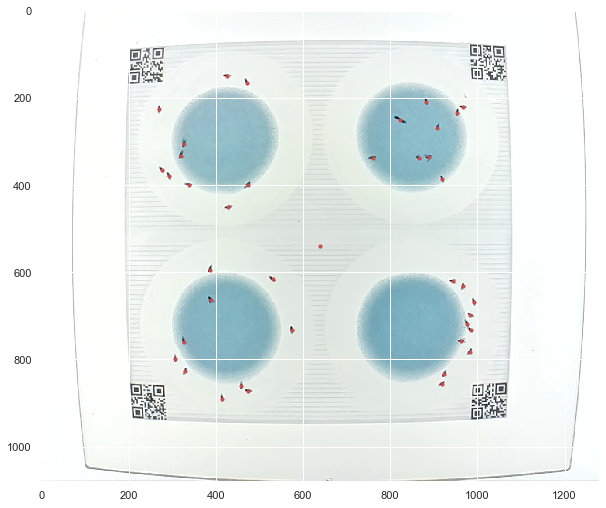

In [15]:
plt.figure(figsize=(10, 10))
plt.imshow(movie[99, :, :])
plt.scatter(output[3][:, 0], output[3][:, 1], s=10, color='r')


In [ ]:
src = cv2.imread('/directorypath/image.bmp')
# Threshold it so it becomes binary
ret, thresh = cv2.threshold(src,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# You need to choose 4 or 8 for connectivity type
connectivity = 4  
# Perform the operation
output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
# Get the results
# The first cell is the number of labels
num_labels = output[0]